In [82]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [35]:
housing = pd.read_csv("data/housing_data.csv")

In [36]:
X = housing.iloc[:,0:3]
y= housing.iloc[:,3]

(array([ 5., 11.,  9., 11.,  5.,  1.,  2.,  0.,  1.,  2.]),
 array([ 852. , 1214.6, 1577.2, 1939.8, 2302.4, 2665. , 3027.6, 3390.2,
        3752.8, 4115.4, 4478. ]),
 <a list of 10 Patch objects>)

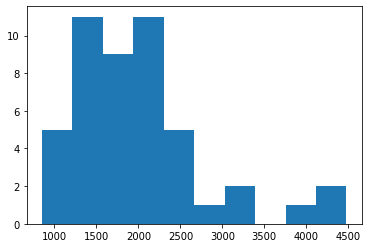

In [89]:
plt.hist(housing['sqft'])


(array([ 1.,  0.,  6.,  0.,  0., 25.,  0., 14.,  0.,  1.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

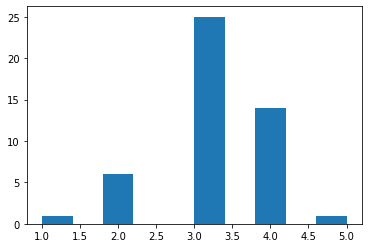

In [88]:
plt.hist(housing['bdrms'])

(array([5., 4., 5., 4., 4., 6., 2., 7., 4., 6.]),
 array([ 5. , 12.4, 19.8, 27.2, 34.6, 42. , 49.4, 56.8, 64.2, 71.6, 79. ]),
 <a list of 10 Patch objects>)

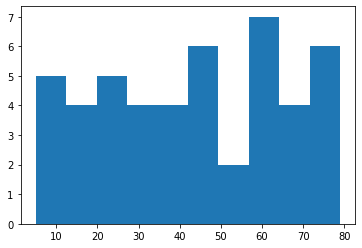

In [90]:
plt.hist(housing['age'])

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_sc,y,test_size=0.2)

In [113]:
model = keras.Sequential()
model.add(Dense(1,input_dim =X.shape[1],activation="linear"))
model.compile(
    optimizer=tf.keras.optimizers.SGD(lr=0.03),
    loss='mse')
model.fit(X_train,y_train,epochs=100,verbose=0)
print(r2_score(y_pred=model.predict(X_test),y_true=y_test),r2_score(y_pred=model.predict(X_train),y_true=y_train))

0.8095443762052489 0.5898552154895227


In [114]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print(r2_score(y_pred=model.predict(X_test),y_true=y_test),r2_score(y_pred=model.predict(X_train),y_true=y_train))

0.7583456809579665 0.5954521183052152
